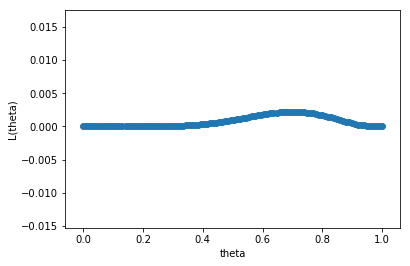

In [293]:
import matplotlib.pylab as plt # Import podpakietu jako plt
# Magia IPython Notebook :) Pokazuje wykresy w konsoli
%matplotlib inline 
import numpy as np
def L(theta):
    return theta**7*((1-theta)**3)
theta_grid =np.linspace(0,1,100)
L_values=map(L,theta_grid)
_=plt.scatter(theta_grid,L_values)
_=plt.xlabel("theta")
_=plt.ylabel("L(theta)")

In [292]:
def flip_coin(theta, nb_flips):
    result=np.random.binomial(1,theta,nb_flips)
    assert len(result) == nb_flips
    return result
print flip_coin(0.3,1000000).mean() #dla dużej liczby rzutów średnia wartość listy jest prawie równa theta

0.299819


In [290]:
class CoinML(object):
    def __init__(self):
        self.theta = None
    def fit(self, X):
        self.theta=X.mean()
    def toss(self):
        result=np.random.binomial(1,self.theta,1)
        return result[0]
x = CoinML()
x.fit(np.array([1,1,0,0,0]))
print "theta = ", x.theta
print  "średnia 10000 rzutów = ", np.array([x.toss() for y in range(10000)]).mean()

theta =  0.4
średnia 10000 rzutów =  0.3972


In [289]:

def L(theta,X):
    return theta**X.sum()*(1-theta)**(len(X)-X.sum())
print L(0.8,np.array([1,1,0,0,0]))    
class CoinMAP(object):

    def __init__(self, prior):
        self.knowledge = prior
        self.theta = None
        
    def fit(self, X):
        alpha=0
        for theta, priori in self.knowledge.iteritems():
            alpha=L(theta,X)*priori+alpha
        #print alpha
        max_key=0
        for theta, priori in self.knowledge.iteritems():
            #print L(theta,X)*priori
            self.knowledge[theta]=L(theta,X)*priori/alpha
           # print max_key, self.knowledge[theta]
            if max_key < self.knowledge[theta]:
                max_key=self.knowledge[theta]
                self.theta=theta
                
    def toss(self):
        result=np.random.binomial(1,self.theta,1)
        return result[0]

#print L(0.6,np.array([1,0,1,1,1,0,0,1,1,1]))    
model = CoinMAP({0.5: 0.8, 0.6: 0.2})
model.fit(np.array([1,0,1,1,1,0,0,1,1,1]))
print "model.knowledge powinno wyjść {0.5: 0.686, 0.6: 0.314}"
print model.knowledge
print "Powinno wyjść 0.5:", model.theta
print "Powinno wyjść 1:", sum(model.knowledge.values())

model = CoinMAP({0.5: 0.5, 0.6: 0.2, 0.8: 0.3})
model.fit(np.array([1,0,1,1,1,0,0,1,1,1]))
print "model.knowledge powinno wyjść {0.5: 0.362, 0.6: 0.265, 0.8: 0.373}"
print model.knowledge
print "Powinno wyjść 0.8:", model.theta
print "Powinno wyjść 1:", sum(model.knowledge.values())

0.00512
model.knowledge powinno wyjść {0.5: 0.686, 0.6: 0.314}
{0.5: 0.6855667631546858, 0.6: 0.3144332368453142}
Powinno wyjść 0.5: 0.5
Powinno wyjść 1: 1.0
model.knowledge powinno wyjść {0.5: 0.362, 0.6: 0.265, 0.8: 0.373}
{0.5: 0.36171237227008995, 0.6: 0.2654373534598428, 0.8: 0.3728502742700672}
Powinno wyjść 0.8: 0.8
Powinno wyjść 1: 1.0


In [288]:
def scalar_product(K):
    alpha=0
    for theta, priori in K.iteritems():
        alpha=theta*priori+alpha
    return alpha
    
class CoinBest(object):
    def __init__(self, prior):
        self.knowledge = prior
        self.theta = scalar_product(self.knowledge)
        
    def fit(self, X):
        alpha=0
        for theta, priori in self.knowledge.iteritems():
            alpha=L(theta,X)*priori+alpha
        #print alpha
        for theta, priori in self.knowledge.iteritems():
            #print L(theta,X)*priori
            self.knowledge[theta]=L(theta,X)*priori/alpha
        self.theta = scalar_product(self.knowledge)
         
    def toss(self):
        result=np.random.binomial(1,self.theta,1)
        return result[0]
    
model = CoinBest({0.5: 0.8, 0.6: 0.2})
model.fit(np.array([1,0,1,1,1,0,0,1,1,1]))
print "model.knowledge powinno wyjść {0.5: 0.686, 0.6: 0.314}"
print model.knowledge
print "Powinno wyjść około 0.53:", model.theta
print "Powinno wyjść 1:", sum(model.knowledge.values())

model = CoinBest({0.5: 0.5, 0.6: 0.2, 0.8: 0.3})
model.fit(np.array([1,0,1,1,1,0,0,1,1,1]))
print "model.knowledge powinno wyjść {0.5: 0.362, 0.6: 0.265, 0.8: 0.373}"
print model.knowledge
print "Powinno wyjść około 0.64:", model.theta
print "Powinno wyjść 1:", sum(model.knowledge.values())

model.knowledge powinno wyjść {0.5: 0.686, 0.6: 0.314}
{0.5: 0.6855667631546858, 0.6: 0.3144332368453142}
Powinno wyjść około 0.53: 0.531443323685
Powinno wyjść 1: 1.0
model.knowledge powinno wyjść {0.5: 0.362, 0.6: 0.265, 0.8: 0.373}
{0.5: 0.36171237227008995, 0.6: 0.2654373534598428, 0.8: 0.3728502742700672}
Powinno wyjść około 0.64: 0.638398817627
Powinno wyjść 1: 1.0


In [300]:
#v1 oznacza w której z bramek jest nagroda możemy przyjąć że jest ona w pierwszej bramce
#v2 oznacza wybór gracza
#v3 oznacza odsłonięcie bramki przez prowadzącego lub przez piorun
#v4 oznacza ponowny wybór gracza
def gra_1():#bez zmiany bramek nie ma potrzeby implementować zachowania prowadzącego
    v1=np.array([1,0,0])
    v2=np.array([0,0,0])
    v2[int(np.floor(np.random.uniform(0,3)))]=1
    return np.inner(v1,v2) 
print  "gra1 stosunek wygranych do przegranych", np.array([gra_1() for y in range(100000)]).mean()
def gra_2():#zamiana bramki 
    v1=np.array([1,0,0])
    v2=np.array([0,0,0])
    v2[int(np.floor(np.random.uniform(0,3)))]=1
    v3=np.array([1,0,0])
    while all(v3==v2) or all(v3==v1):
        v3=np.array([0,0,0])
        v3[int(np.floor(np.random.uniform(0,3)))]=1
    return not np.inner(v1,v2+v3) #suma wetorów v2 i v3 pokazuje która bramki nie zostały wbrane przez gracza
print  "gra2 stosunek wygranych do przegranych", np.array([gra_2() for y in range(100000)]).mean()
def gra_3():# piorun z przegraną przy uderzeniu w nagrode 
    v1=np.array([1,0,0])
    v2=np.array([0,0,0])
    v2[int(np.floor(np.random.uniform(0,3)))]=1
    v3=np.array([0,0,0])
    v3[int(np.floor(np.random.uniform(0,3)))]=1
    if(all(v1==v3)):
        return 0
    while all(v3==v2): #generujemy nową decyzje gracza jeśli piorun uderzył w wybranną przez niego bramke
        v2=np.array([0,0,0])
        v2[int(np.floor(np.random.uniform(0,3)))]=1
    return np.inner(v1,v2)
print  "gra3 stosunek wygranych do przegranych", np.array([gra_3() for y in range(100000)]).mean()
def gra_4(): # piorun z przegraną przy uderzeniu w nagrode i zmianą bramki przez gracza
    v1=np.array([1,0,0])
    v2=np.array([0,0,0])
    v2[int(np.floor(np.random.uniform(0,3)))]=1
    v3=np.array([0,0,0])
    v3[int(np.floor(np.random.uniform(0,3)))]=1
    if(all(v1==v3)):
        return 0
    v4=v2
    while all(v4==v2) and all(v4==v3): #generujemy nową decyzje gracza zawsze
        v4=np.array([0,0,0])
        v4[int(np.floor(np.random.uniform(0,3)))]=1
    return np.inner(v1,v4)
print  "gra4 stosunek wygranych do przegranych", np.array([gra_4() for y in range(100000)]).mean()
def gra_5():# piorun z grą od nowa przy uderzeniu w nagrode 
    v1=np.array([1,0,0])
    v2=np.array([0,0,0])
    v2[int(np.floor(np.random.uniform(0,3)))]=1
    v3=np.array([0,0,0])
    v3[int(np.floor(np.random.uniform(0,3)))]=1
    if(all(v1==v3)):
        return gra_5()
    while all(v3==v2): #generujemy nową decyzje gracza jeśli piorun uderzył w wybranną przez niego bramke
        v2=np.array([0,0,0])
        v2[int(np.floor(np.random.uniform(0,3)))]=1
    return np.inner(v1,v2)
print  "gra5 stosunek wygranych do przegranych", np.array([gra_5() for y in range(100000)]).mean()
def gra_6():# piorun z grą od nowa przy uderzeniu w nagrode i zmianą bramki przez gracza
    v1=np.array([1,0,0])
    v2=np.array([0,0,0])
    v2[int(np.floor(np.random.uniform(0,3)))]=1
    v3=np.array([0,0,0])
    v3[int(np.floor(np.random.uniform(0,3)))]=1
    if(all(v1==v3)):
        return gra_5()
    v4=v2
    while all(v4==v2) and all(v4==v3): #generujemy nową decyzje gracza zawsze
        v4=np.array([0,0,0])
        v4[int(np.floor(np.random.uniform(0,3)))]=1
    return np.inner(v1,v4)  
print  "gra6 stosunek wygranych do przegranych", np.array([gra_6() for y in range(100000)]).mean()

gra1 stosunek wygranych do przegranych 0.33317
gra2 stosunek wygranych do przegranych 0.66629
gra3 stosunek wygranych do przegranych 0.33262
gra4 stosunek wygranych do przegranych 0.33372
gra5 stosunek wygranych do przegranych 0.50254
gra6 stosunek wygranych do przegranych 0.50011
